
## Laborator 1


In [1]:
from IPython.display import display, Latex

def printLatex(string):
    display(Latex(f'${string}$'))
    
%display latex

## Problema 8

In [18]:
# fun - function
# i - coeficient index
# symbol - the symbol of the function
def coeficient_taylor(fun, i, symbol):
    if i < 0:
        return 0 
    # derivam functia fun de i ori in punctul 0 / i !
    return fun.derivative(symbol, i).subs(x = 0) / factorial(i)

In [19]:
# fun - function
# m - gradul polinomului de sus
# m - gradul polinomului de jos
# x - the symbol of the function
def pade(fun, m, k, x):
    # daca gradul polinomului de jos este 0, atunci b0 = 1 => 
    # f(x) = polinomul de gradul m al lui Taylor in vecinatatea punctului a = 0
    if k == 0:
        return taylor(fun, x, 0, m) 
    # altfel, calculam matricea pe care o initializam cu 0-uri
    mat = [[0] * k for _ in range(k)]
    rez = [0] * k
    for i in range(k):
        # calculam prima linie
        mat[i][0] = coeficient_taylor(fun, m + i, x)
        # calculam prima coloana
        mat[0][i] = coeficient_taylor(fun, m - i, x)
        # calculam matricea rezultat
        rez[i] = [- coeficient_taylor(fun, m + i + 1, x)]
    # populam intreaga matrice
    for i in range(1, k):
        for j in range(1, k):
            mat[i][j] = mat[i - 1][j - 1]
    # calculam matricea coeficientilor polinomului b
    mat = matrix(mat)
    mat = mat.inverse()
    rez = matrix(rez)
    mat = mat * rez
    # se adauga elementul b0 = 1
    b = [1] + [elem[0] for elem in list(mat)]
    # se initializeaza matricea coeficientilor a cu 0-uri
    a = [0 for i in range(m + 1)]
    # calculam matricea coeficientilor polinomului a
    for j in range(m + 1):
        for l in range(min(j, k) + 1):
            a[j] += coeficient_taylor(fun, j - l, x) * b[l]
    P = 0
    for i in range(m + 1):
        P += a[i] * x ^ i
    Q = 0
    for i in range(k + 1):
        Q += b[i] * x ^ i

    return P / Q

x = var('x')
pade(exp(x), 2, 2, x)

(x^2 + 6*x + 12)/(x^2 - 6*x + 12)

In [20]:
#Computing Pade's approximations of e^x
R11(x) = pade(exp(x), 1, 1, x)
R22(x) = pade(exp(x), 2, 2, x)

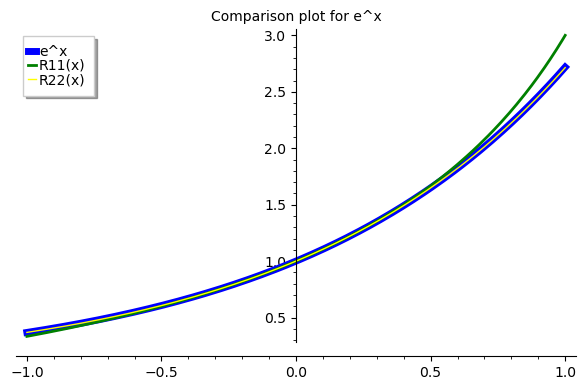

In [22]:
p1 = plot(exp(x), (x, -1, 1), thickness=5, title='Comparison plot for e^x', legend_label='e^x')
p2 = plot(R11(x), (x, -1, 1), thickness=2, color='green', legend_label = 'R11(x)')
p3 = plot(R22(x), (x, -1, 1), thickness=1, color='yellow', legend_label = 'R22(x)')

p1 + p2 + p3

In [23]:
#Computing Pade's approximations of ln(1 + x)
R22(x) = pade(ln(1 + x), 2, 2, x)
R31(x) = pade(ln(1 + x), 3, 1, x)

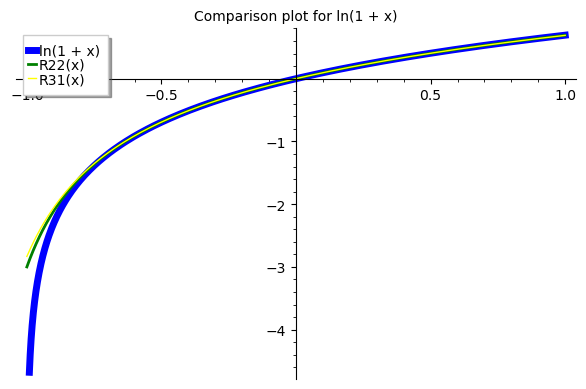

In [24]:
p1 = plot(ln(1 + x), (x, -1, 1), thickness=5, title='Comparison plot for ln(1 + x)', legend_label='ln(1 + x)')
p2 = plot(R22(x), (x, -1, 1), thickness=2, color='green', legend_label = 'R22(x)')
p3 = plot(R31(x), (x, -1, 1), thickness=1, color='yellow', legend_label = 'R31(x)')

p1 + p2 + p3

### Problema 9

In [33]:
#Compute Pade's approximations for the Bessel Function
x = var('x')
mcLauren = taylor(bessel_J(0, 2*x), x, 0, 7)
R22(x) = pade(bessel_J(0, 2*x), 2, 2, x)
R43(x) = pade(bessel_J(0, 2*x), 4, 3, x)
R24(x) = pade(bessel_J(0, 2*x), 2, 4, x)

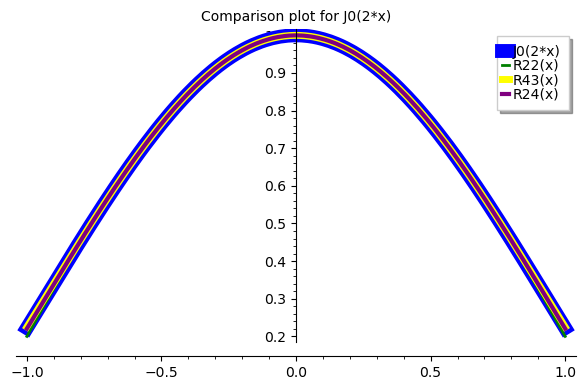

In [34]:
p1 = plot(mcLauren, (x, -1, 1), thickness=10, title='Comparison plot for J0(2*x)', legend_label='J0(2*x)')
p2 = plot(R22(x), (x, -1, 1), thickness=2, color='green', legend_label = 'R22(x)')
p3 = plot(R43(x), (x, -1, 1), thickness=5, color='yellow', legend_label = 'R43(x)')
p4 = plot(R24(x), (x, -1, 1), thickness=3, color='purple', legend_label = 'R24(x)')

p1 + p2 + p3 + p4 

### Problema 10 (Suplimentara)

In [10]:
# Define the function and the point around which to calculate the Taylor polynomial
var('x')
f(x) = ln(1 + x)
a = 0

# Define the degree of the Taylor polynomial
n = 3

# Calculate the nth degree Taylor polynomial around the point a
Pn = taylor(f(x), x, a, n)

In [11]:
# Define the Lagrange remainder formula
var('theta')
Rn(x) = ((x - a)^(n+1) * diff(f(x), x, n+1)(a + theta*(x - a))) / factorial(n+1)

# Substitute theta = 0 in the Lagrange remainder formula to evaluate it at x
# theta can be 0 or 1, but 0 gives the upper bound
# ln(1 + x)' = 1 / (1 + x) => descending => max point is 0 => theta is 0
Rnf = Rn(x).subs(theta == 0)

# Define the point x0 at which to evaluate the Taylor polynomial and the Lagrange remainder
x0 = 1

# Evaluate the Taylor polynomial and the Lagrange remainder at x0
Pn_x0 = Pn.subs(x == x0)
Rnf_x0 = Rnf.subs(x == x0)

In [12]:
# Print the Taylor polynomial and the Lagrange remainder at x0
print("Taylor polynomial of degree", n, "at x =", x0, ":", Pn_x0)
print("Lagrange remainder of degree", n, "at x =", x0, ":", Rnf_x0)

Taylor polynomial of degree 3 at x = 1 : 5/6
Lagrange remainder of degree 3 at x = 1 : -1/4
